In [1]:
cd /Users/vicky/Desktop/CitPy/citpy_analysis

/Users/vicky/Desktop/CitPy/citpy_analysis


In [2]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import matplotlib.pyplot as plt

In [3]:
data = pd.read_csv('classifications.csv')

In [4]:
data = data[:20]

In [5]:
data.at[9,'annotations']

'[{"task":"T0","task_label":"Drag your finger to draw lines to mark the **width** and **length** of the microleaves in the image on the left. ","value":[{"x1":584,"x2":583,"y1":257,"y2":66,"tool":0,"frame":0,"details":[],"tool_label":"Leaf Ruler"},{"x1":526,"x2":627,"y1":136,"y2":136,"tool":0,"frame":0,"details":[],"tool_label":"Leaf Ruler"}]}]'

In [6]:
data

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids
0,29905097,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.5,2017-02-24 22:40:36 UTC,NaN,NaN,"{""session"":""e5d9ed16354f32ec191c0639d82d416bc4...","[{""task"":""T0"",""task_label"":""Draw a line to mar...","{""5653194"":{""retired"":null,""Filename"":""9511_si...",5653194
1,30252949,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.5,2017-02-27 16:05:05 UTC,NaN,NaN,"{""session"":""a04a5397e7da0747672614e5547550cf8b...","[{""task"":""T0"",""task_label"":""Draw a line to mar...","{""5653194"":{""retired"":null,""Filename"":""9511_si...",5653194
2,30298705,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-02-27 22:11:54 UTC,NaN,NaN,"{""session"":""77e0c7258f772cc901226d11813ab0c78b...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""5653194"":{""retired"":null,""Filename"":""9511_si...",5653194
3,30299339,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-02-27 22:16:37 UTC,NaN,NaN,"{""session"":""0dd5c48126b969b48e88a15e75e712cf85...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262370"":{""retired"":null,""latitude"":""-37.553...",6262370
4,30299347,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-02-27 22:16:40 UTC,NaN,NaN,"{""session"":""0dd5c48126b969b48e88a15e75e712cf85...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262339"":{""retired"":null,""latitude"":"""",""long...",6262339
5,30300261,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-02-27 22:22:36 UTC,NaN,NaN,"{""session"":""5fbbb97829bc8f2b23319b03a800c22d73...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262403"":{""retired"":null,""latitude"":""-40.967...",6262403
6,30380376,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-02-28 16:03:13 UTC,NaN,NaN,"{""session"":""191c9f8ddc332aaa36f04236e546c3cec3...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262372"":{""retired"":null,""latitude"":""-37.553...",6262372
7,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-02-28 16:14:48 UTC,NaN,NaN,"{""session"":""c506af503f343f887979c67da5596a53ce...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362
8,30408630,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-02-28 17:02:24 UTC,NaN,NaN,"{""session"":""86c694e831462f88549dfbf1d6fb4a4a56...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262363"":{""retired"":null,""latitude"":""-29.267...",6262363
9,30418906,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-02-28 17:14:42 UTC,NaN,NaN,"{""session"":""86c694e831462f88549dfbf1d6fb4a4a56...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262405"":{""retired"":null,""latitude"":""-40.967...",6262405


In [7]:
def vals_to_new_column(data_column):
    """
    takes the data.annotations column as a parameter
    returns dataframe with individual segment coordinates stored in a row
    """
    list_vals = []
    for entry in json.loads(data_column)[0]['value']:
        list_vals.append([entry['x1'], entry['y1'], entry['x2'], entry['y2']])
    return list_vals

data['listed_vals'] = data['annotations'].apply(vals_to_new_column)

In [8]:
data['listed_vals'] = data['annotations'].apply(vals_to_new_column)

In [9]:
data[10:]

,classification_id,user_name,user_id,user_ip,workflow_id,workflow_name,workflow_version,created_at,gold_standard,expert,metadata,annotations,subject_data,subject_ids,listed_vals
10,30438129,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-02-28 17:40:37 UTC,NaN,NaN,"{""session"":""86c694e831462f88549dfbf1d6fb4a4a56...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262392"":{""retired"":null,""latitude"":""-40.967...",6262392,[]
11,31074072,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-03-02 15:30:05 UTC,NaN,NaN,"{""session"":""0407920a880fb04e713625ab8dbdf695c5...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262343"":{""retired"":null,""latitude"":""-55.032...",6262343,"[[475, 61, 493, 164], [574, 82, 362, 157]]"
12,31124696,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-03-02 18:32:45 UTC,NaN,NaN,"{""session"":""f3f5fd727d1631f60c3cdbd08a50992f5f...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,"[[242, 353, 321, 351], [287, 289, 282, 413], [..."
13,31173577,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-03-02 20:58:26 UTC,NaN,NaN,"{""session"":""00e550eabb59f1a7b82ecd2ababa11356f...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262398"":{""retired"":null,""latitude"":""-40.967...",6262398,[]
14,31175443,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-03-02 21:03:36 UTC,NaN,NaN,"{""session"":""172f87cd784fc94126337a8776b909b333...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262371"":{""retired"":null,""latitude"":""-37.553...",6262371,"[[640, 97, 582, 232], [569, 150, 647, 183], [4..."
15,31176981,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-03-02 21:08:00 UTC,NaN,NaN,"{""session"":""9e25de5c0bf8d8fb3c14f028b88fb85218...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262397"":{""retired"":null,""latitude"":""-40.967...",6262397,"[[257, 619, 257, 619], [259, 617, 259, 583], [..."
16,31184143,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-03-02 21:30:09 UTC,NaN,NaN,"{""session"":""00e550eabb59f1a7b82ecd2ababa11356f...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262366"":{""retired"":null,""latitude"":"""",""long...",6262366,"[[481, 191, 507, 298], [487, 278, 533, 259]]"
17,31352367,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-03-03 14:56:06 UTC,NaN,NaN,"{""session"":""9f32132514ee144a97288d9dcccfefc78a...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262341"":{""retired"":null,""latitude"":""-54.700...",6262341,"[[356, 160, 331, 354], [278, 260, 389, 272]]"
18,31364105,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-03-03 15:43:10 UTC,NaN,NaN,"{""session"":""9f32132514ee144a97288d9dcccfefc78a...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262359"":{""retired"":null,""latitude"":""-29.267...",6262359,"[[541, 221, 646, 328], [560, 297, 629, 234]]"
19,31365282,not-logged-in-3dfa3cd88ac5a4508e6c,NaN,3dfa3cd88ac5a4508e6c,3449,Measure Leaves,5.8,2017-03-03 15:47:33 UTC,NaN,NaN,"{""session"":""9f32132514ee144a97288d9dcccfefc78a...","[{""task"":""T0"",""task_label"":""Drag your finger t...","{""6262343"":{""retired"":null,""latitude"":""-55.032...",6262343,"[[492, 398, 688, 494], [566, 504, 614, 415], [..."


In [10]:
def classification_raw_number(uncleaned_data):
    total = 0
    for row in range(len(uncleaned_data)):
        row_classifications = 0
        if len(uncleaned_data.listed_vals[row]) > 1:
            if len(uncleaned_data.listed_vals[row])% 2==0:
                row_classifications += len(uncleaned_data.listed_vals[row])/2
            else:
                row_classifications += (len(uncleaned_data.listed_vals[row])/2) -1
            print(row_classifications)
            total += row_classifications
    return total
    

In [11]:
#other interesting things to look at:

# 1. number of attempted lobule classifications per subject image - 
    # if consistent, all lobules in subject image are probably clear and obvious
    
# 2. clustered intersections / major and minor axes for given subject image

# 3. think about necessary retirement counts
    # how many classifications of a given lobule are necessary to gain accurate analysis
    
# 4. machine learning - how can we use it. 


In [12]:
import numpy as np
import math

class Segment:
    def __init__(self, x1, y1, x2, y2):
        self.x1 = x1
        self.y1 = y1
        self.x2 = x2
        self.y2 = y2
        self.minx=0 #screen dimensions
        self.maxx=720 #screen dimensions
        self.miny=0 #screen dimensions
        self.maxy=534 #screen dimensions
        self.tolerance=5 #allowed distance from the edge
        
    def point_on_screen(self):
        if ((self.minx-self.tolerance <= self.x1 <= self.maxx+self.tolerance) and \
             (self.minx-self.tolerance <= self.x2 <= self.maxx+self.tolerance) and \
             (self.miny-self.tolerance <= self.y1 <= self.maxy+self.tolerance) and \
             (self.miny-self.tolerance <= self.y2 <= self.maxy+self.tolerance)):
             return True
        else:
             return False

    def find_line_equation(self):
        A = self.y1 - self.y2
        B = self.x2 - self.x1 
        C = A * self.x1 + B * self.y1 
        return_list: List[Any] = [A, B, C]
        return return_list
    

class CheckLeaf:
    def __init__(self, segA, segB):
        self.segA = segA
        self.segB = segB
        self.segclassA = Segment(segA[0],segA[1],segA[2],segA[3])
        self.segclassB = Segment(segB[0],segB[1],segB[2],segB[3])
        self.coefficients_a = self.segclassA.find_line_equation()
        self.coefficients_b = self.segclassB.find_line_equation()
        self.x1_a = segA[0]
        self.y1_a = segA[1]
        self.x2_a = segA[2]
        self.y2_a = segA[3]
        self.x1_b = segB[0]
        self.y1_b = segB[1]
        self.x2_b = segB[2]
        self.y2_b = segB[3]
        
    def on_screen(self):
        if self.segclassA.point_on_screen() and self.segclassB.point_on_screen():
            return True
        else:
            return False

    def find_the_intersection_point(self):
        coefficient_matrix = np.matrix([[self.coefficients_a[0], self.coefficients_a[1]], [self.coefficients_b[0], self.coefficients_b[1]]])
        RHS_matrix = np.matrix([[self.coefficients_a[2]], [self.coefficients_b[2]]])
        det = np.linalg.det(coefficient_matrix)
        if (det ** 2 > 0.00000001):
            # in this case, the segments intersect somewhere
            inverse_coefficient_matrix = coefficient_matrix.I
            solution = inverse_coefficient_matrix.dot(RHS_matrix)
            return solution
        else:
            # in this case, the lines are essentially parallel, so they will not intersect on screen, if at all.  I've put in a fake point which will fail a later llogic check.
            return ([-1000000, -1000000])

    def line_segments_intersect(self):
        det = np.linalg.det(np.matrix([[self.coefficients_a[0], self.coefficients_a[1]], [self.coefficients_b[0], self.coefficients_b[1]]]))
        if (det ** 2 > 0.0001):
            intersection_point = self.find_the_intersection_point()
            # find boundaries of the line segments.
            min_ax = int(min(self.x1_a, self.x2_a));
            max_ax = int(max(self.x1_a, self.x2_a))
            min_ay = int(min(self.y1_a, self.y2_a));
            max_ay = int(max(self.y1_a, self.y2_a))
            min_bx = int(min(self.x1_b, self.x2_b));
            max_bx = int(max(self.x1_b, self.x2_b))
            min_by = int(min(self.y1_b, self.y2_b));
            max_by = int(max(self.y1_b, self.y2_b))
            # If the intersection is within the boundaries
            # defined by the most extreme values of the coordinates then we can be assured that the
            # line segments actually do intersect. The following if statement returns the necessary
            # TRUE or FALSE that we want to see in order to move on.
            if ((min_ax <= intersection_point[0] <= max_ax) and \
                    (min_ay <= intersection_point[1] <= max_ay) and \
                    (min_bx <= intersection_point[0] <= max_bx) and \
                    (min_by <= intersection_point[1] <= max_by)):
                return True
            else:
                return False
        else:
            return False # a determinent of zero means the line segments are parallel.
        
    def calc_slopes(self):
        slope1 = (self.y1_a - self.y2_a) / (self.x1_a - self.x2_a) if (self.x1_a - self.x2_a) != 0 else 0.0
        slope2 = (self.y1_b - self.y2_b) / (self.x1_b - self.x2_b) if (self.x1_b - self.x2_b) != 0 else 0.0
        return slope1, slope2

    def calc_angle_between_segments(self):
            slope1, slope2 = self.calc_slopes()
            numerator = (slope2 - slope1)
            denominator = (1 + slope2 * slope1)
            if denominator == 0:
                return 90.0
            else:
                return ((math.atan(numerator / denominator) * 180 / math.pi))

    def calc_lengths_minor_major(self):
        """
        returns: 0 - major axis length, 1 - major axis coordinates, 2 - minor axis length, 3 - minor axis coordinates
        """
        length_axis1 = math.sqrt(abs(self.y1_a - self.y2_a) ** 2 + abs(self.x1_a - self.x2_a) ** 2)
        length_axis2 = math.sqrt(abs(self.y1_b - self.y2_b) ** 2 + abs(self.x1_b - self.x2_b) ** 2)
        if length_axis1 > length_axis2:
            return length_axis1, self.segA, length_axis2, self.segB
        else:
            return length_axis2, self.segB, length_axis1, self.segA

In [13]:
#tests
#90 angles
testangle90 = CheckLeaf([0,0,4,4],[0,4,4,0])
testanglevertslope = CheckLeaf([4,0,4,4], [0,2,6,2])

In [38]:
#print(testangle90.coefficients_a)
#print(testangle90.calc_angle_between_segments())
#print(testangle90.calc_lengths_minor_major())
print(testangle90.find_the_intersection_point()[0])

[[2.]]


In [15]:
testangle90.calc_slopes()
testangle90.calc_angle_between_segments()

90.0

In [40]:
import itertools

def make_plant_datasheet(data_table):
    """
    takes the datasheet with 'listed_vals' column as a parameter
    returns dataframe with useful metadata, angle, axis length and axis coordinates.
    """
    df = pd.DataFrame() #columns = [0: 'classification_id', 'username', 'created_at', 'subject_data' , 'angle', 'major_axis_length', 'x1_major', 'x2_major', 'y1_major', 'y2_major', 'minor_axis_length', 'x1_minor', 'x2_minor', 'y1_minor', 'y2_minor'] (will rename at end)
    for row_num in range(len(data_table)):
        for combo in itertools.combinations(data_table.listed_vals[row_num], 2):
            segments_to_check = CheckLeaf(combo[0],combo[1])
            if segments_to_check.on_screen() and segments_to_check.line_segments_intersect() and segments_to_check.calc_angle_between_segments() > 80.0:
                lengths_minor_major = segments_to_check.calc_lengths_minor_major()
                
                df = df.append([[data_table.classification_id[row_num], \
                                 data_table.user_name[row_num], \
                                 data_table.created_at[row_num], \
                                 data_table.subject_data[row_num], \
                                 data_table.subject_ids[row_num], \
                                 segments_to_check.calc_angle_between_segments(), \
                                 float(str(segments_to_check.find_the_intersection_point()[0])[2:-2]), \
                                 float(str(segments_to_check.find_the_intersection_point()[1])[2:-2]), \
                                 lengths_minor_major[0], \
                                 lengths_minor_major[1][0], \
                                 lengths_minor_major[1][1], \
                                 lengths_minor_major[1][2], \
                                 lengths_minor_major[1][3], \
                                 lengths_minor_major[2], \
                                 lengths_minor_major[3][0], \
                                 lengths_minor_major[3][1], \
                                 lengths_minor_major[3][2], \
                                 lengths_minor_major[3][3]]]) 

    df = df.rename({0: 'classification_id', \
                    1: 'username', \
                    2: 'created_at', \
                    3: 'subject_data', \
                    4: 'subject_id', \
                    5: 'angle', \
                    6: 'intersection_point_x', \
                    7: 'intersection_point_y', \
                    8: 'major_axis_length', \
                    9: 'major_x1', \
                    10: 'major_y1', \
                    11: 'major_x2', \
                    12: 'major_y2', \
                    13:'minor_axis_length', \
                    14: 'minor_x1', \
                    15: 'minor_y1', \
                    16: 'minor_x2', \
                    17: 'minor_y2',},\
                   axis = 'columns')
    df.reset_index()
    #figure out how to rename index
    return df

In [41]:
newdf = make_plant_datasheet(data)

UnboundLocalError: local variable 'df' referenced before assignment

In [37]:
newdf

,classification_id,username,created_at,subject_data,subject_id,angle,intersection_point_x,intersection_point_y,major_axis_length,major_x1,major_y1,major_x2,major_y2,minor_axis_length,minor_x1,minor_y1,minor_x2,minor_y2
0,30380376,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:03:13 UTC,"{""6262372"":{""retired"":null,""latitude"":""-37.553...",6262372,89.500802,587.673267,304.606337,138.621788,636,351,536,255,72.862885,559,335,609,282
0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,88.157423,342.502181,232.219193,132.849539,336,175,351,307,82.873397,385,226,303,238
0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,84.788615,429.580565,89.776407,138.090550,432,23,427,161,73.109507,389,92,462,88
0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,89.477009,652.504844,141.824516,142.835570,714,101,595,180,75.166482,637,118,678,181
0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,85.260928,492.274611,414.823834,122.482652,430,430,549,401,60.083276,486,396,505,453
0,30381722,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 16:14:48 UTC,"{""6262362"":{""retired"":null,""latitude"":""-29.267...",6262362,87.098180,194.403276,423.730172,155.544206,200,357,187,512,74.672619,152,418,226,428
0,30408630,not-logged-in-3dfa3cd88ac5a4508e6c,2017-02-28 17:02:24 UTC,"{""6262363"":{""retired"":null,""latitude"":""-29.267...",6262363,88.788487,267.942598,370.824773,186.868938,213,431,339,293,74.411021,259,363,315,412
0,31074072,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-02 15:30:05 UTC,"{""6262343"":{""retired"":null,""latitude"":""-55.032...",6262343,80.430317,484.220478,113.761623,224.875521,574,82,362,157,104.560987,475,61,493,164
0,31175443,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-02 21:03:36 UTC,"{""6262371"":{""retired"":null,""latitude"":""-37.553...",6262371,89.682307,609.811475,167.266393,146.931957,640,97,582,232,84.693565,569,150,647,183
0,31175443,not-logged-in-3dfa3cd88ac5a4508e6c,2017-03-02 21:03:36 UTC,"{""6262371"":{""retired"":null,""latitude"":""-37.553...",6262371,88.488874,447.582464,239.090267,165.196852,488,148,421,299,86.539009,411,224,491,257


In [18]:
test1 = newdf.loc[newdf['subject_id']==6262362]

In [20]:
test2 = newdf.loc[newdf['subject_id']==6262371]

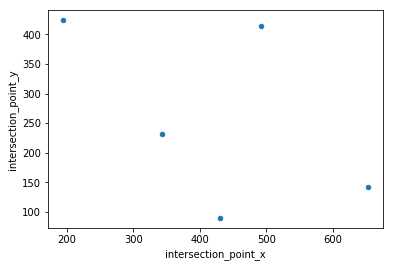

In [21]:
test1.plot.scatter(x='intersection_point_x', y='intersection_point_y')

In [ ]:
test2.plot.scatter(x='intersection_point_x', y='intersection_point_y')

In [ ]:
test1.plot.scatter(x='minor_x1', y='minor_y1')

In [ ]:
test2.plot.scatter(x=['minor_x1','minor_x2'], y=['minor_y1','minor_y2'])

In [ ]:
test2.plot.scatter(x='major_x1', y='major_y2')

In [ ]:
test1.plot.scatter(x=['major_x1','major_x2'], y=['major_y1','major_y2'])

In [ ]:
test1.plot.scatter(x=['major_x2'], y=['major_y2'])

In [ ]:
test1.plot.scatter(x=['major_x1'], y=['major_y1'])